/home/student/.local/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


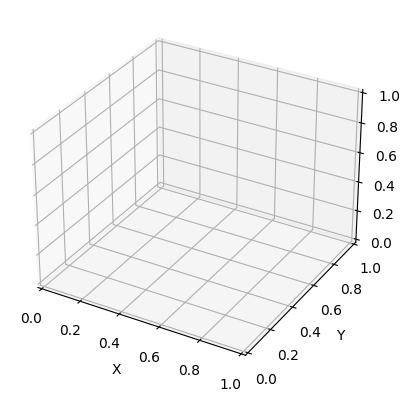

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

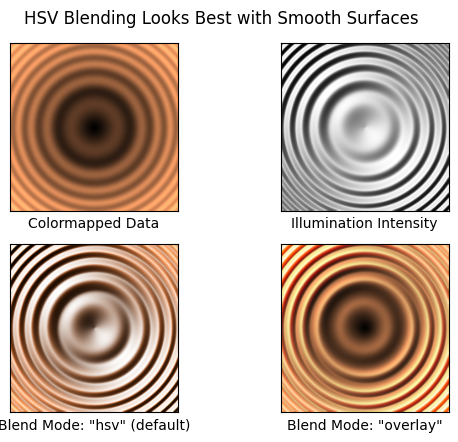

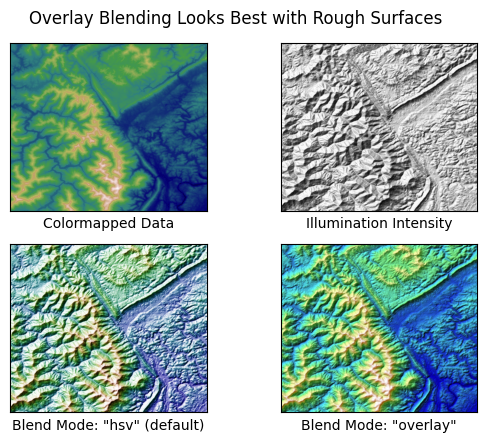

In [2]:
import numpy as np
from matplotlib import cbook
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource


def main():
    # Test data
    x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
    z = 5 * (np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2))

    dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
    elev = dem['elevation']

    fig = compare(z, plt.cm.copper)
    fig.suptitle('HSV Blending Looks Best with Smooth Surfaces', y=0.95)

    fig = compare(elev, plt.cm.gist_earth, ve=0.05)
    fig.suptitle('Overlay Blending Looks Best with Rough Surfaces', y=0.95)

    plt.show()


def compare(z, cmap, ve=1):
    # Create subplots and hide ticks
    fig, axs = plt.subplots(ncols=2, nrows=2)
    for ax in axs.flat:
        ax.set(xticks=[], yticks=[])

    # Illuminate the scene from the northwest
    ls = LightSource(azdeg=315, altdeg=45)

    axs[0, 0].imshow(z, cmap=cmap)
    axs[0, 0].set(xlabel='Colormapped Data')

    axs[0, 1].imshow(ls.hillshade(z, vert_exag=ve), cmap='gray')
    axs[0, 1].set(xlabel='Illumination Intensity')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='hsv')
    axs[1, 0].imshow(rgb)
    axs[1, 0].set(xlabel='Blend Mode: "hsv" (default)')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='overlay')
    axs[1, 1].imshow(rgb)
    axs[1, 1].set(xlabel='Blend Mode: "overlay"')

    return fig


if __name__ == '__main__':
    main()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mydf = pd.read_csv("cereal.csv", sep=",")
mydf.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
mydf.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [5]:
mydf['name'].is_unique

True

In [6]:
mydf.loc[3]

name        All-Bran with Extra Fiber
mfr                                 K
type                                C
calories                           50
protein                             4
fat                                 0
sodium                            140
fiber                            14.0
carbo                             8.0
sugars                              0
potass                            330
vitamins                           25
shelf                               3
weight                            1.0
cups                              0.5
rating                      93.704912
Name: 3, dtype: object

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


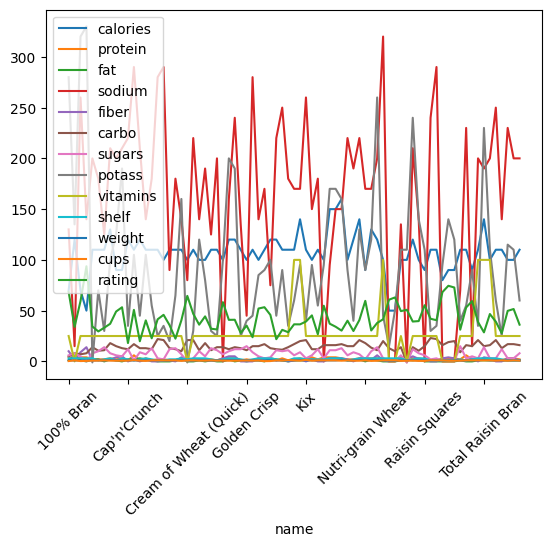

In [8]:
mydf.plot(x='name', rot=45)
mydf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
#t = np.arange(0.0, 2.0, 0.01)
t = np.arange(8, 5)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
#ax.plot(t, s)
ax.plot(2,7)

ax.set(xlabel='Status', ylabel='Cereal Names',
       title='Nutrition Facts of 80 Best Selling Breakfast Cereals')
ax.grid()

plt.show()